### Understanding Support Vector Machine

The goal of this tutorial is to implement SVM from scratch after brief explanation.

In [45]:
import numpy as np
from matplotlib import pyplot as plt

X = np.array([
    [-2,  4, -1],
    [ 4,  1, -1],
    [ 1,  6, -1],
    [ 2,  4, -1],
    [ 6,  2, -1],
])

y = np.array([-1,-1,1,1,1])




In [46]:
def displayDatapoints( X, Y ):
    col = np.where(Y > 0, 'b', 'r')
    plt.scatter(X[ :, 0 ], X[ :, 1 ], c=col, s=5)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.axis('tight')
    plt.show()

In [47]:
class SVM():
    def __init__( self ):
        self.weights=0

    def train(self,X,Y):
        # Initialize our SVMs weight vector with zeros (3 values)
        self.weights = np.zeros(len(X[0]))
        # The learning rate
        eta = 1
        # how many iterations to train for
        epochs = 100000
        # store misclassifications so we can plot how they change over time
        errors = []

        # training part, gradient descent part
        for epoch in range(1, epochs):
            error = 0
            for i, x in enumerate(X):
                # misclassification
                if (Y[i] * np.dot(X[i], self.weights)) < 1:
                    # misclassified update for ours weights
                    self.weights = self.weights  + eta * ((X[i] * Y[i]) + (-2 * (1 / epoch) * self.weights ))
                    error = 1
                else:
                    # correct classification, update our weights
                    self.weights = self.weights  + eta * (-2 * (1 / epoch) * self.weights )

            errors.append(error)
        # lets plot the rate of classification errors during training for our SVM
        plt.plot(errors, '|')
        plt.ylim(0.5, 1.5)
        plt.axes().set_yticklabels([])
        plt.xlabel('Epoch')
        plt.ylabel('Misclassified')
        plt.show()

        print("SVM trained!")

    def predict(self,x):
        prediction = np.dot(self.weights, x)
        if prediction >= 0:
            return 1
        else:
            return -1



In [ ]:

def Test(svm,X,Y):
    for i in range(0, X.shape[0]):
        print("Prediction ", svm.predict(X[i]))
        print("Truth	   ", Y[i])

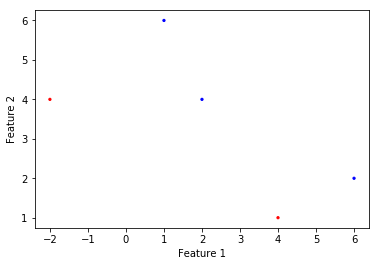

IndexError: tuple index out of range

In [48]:

displayDatapoints(X, y)

svm = SVM()
svm.train(X,Y)

print(svm.weights)
Test(svm,X,Y)